# Outlier detection and handling

In [1]:
# Import needed packages
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import os
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Set a random state
rs = 4

#Set amount of splits
cv_split = 5

In [2]:
#Define monetary_score
def monetary_score_func(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    monetary_value = (cm[0,0] * 0) + (cm[1, 0] * -5) + (cm[0, 1] * -25) + (cm[1, 1] * 5)
    max_monetary_value = (cm[1,0] + cm[1,1]) * 5
    return (monetary_value / max_monetary_value)

monetary_score = make_scorer(monetary_score_func)

In [3]:
# get current directory 
path = os.getcwd() 

# get parent directory 
parent = os.path.dirname(path)

# move to the directory with data
train_csv = os.path.join(parent, "data", "train.csv")

#Import our dataset
dataset = pd.read_csv(train_csv, delimiter = '|')
dataset_org = dataset.copy()

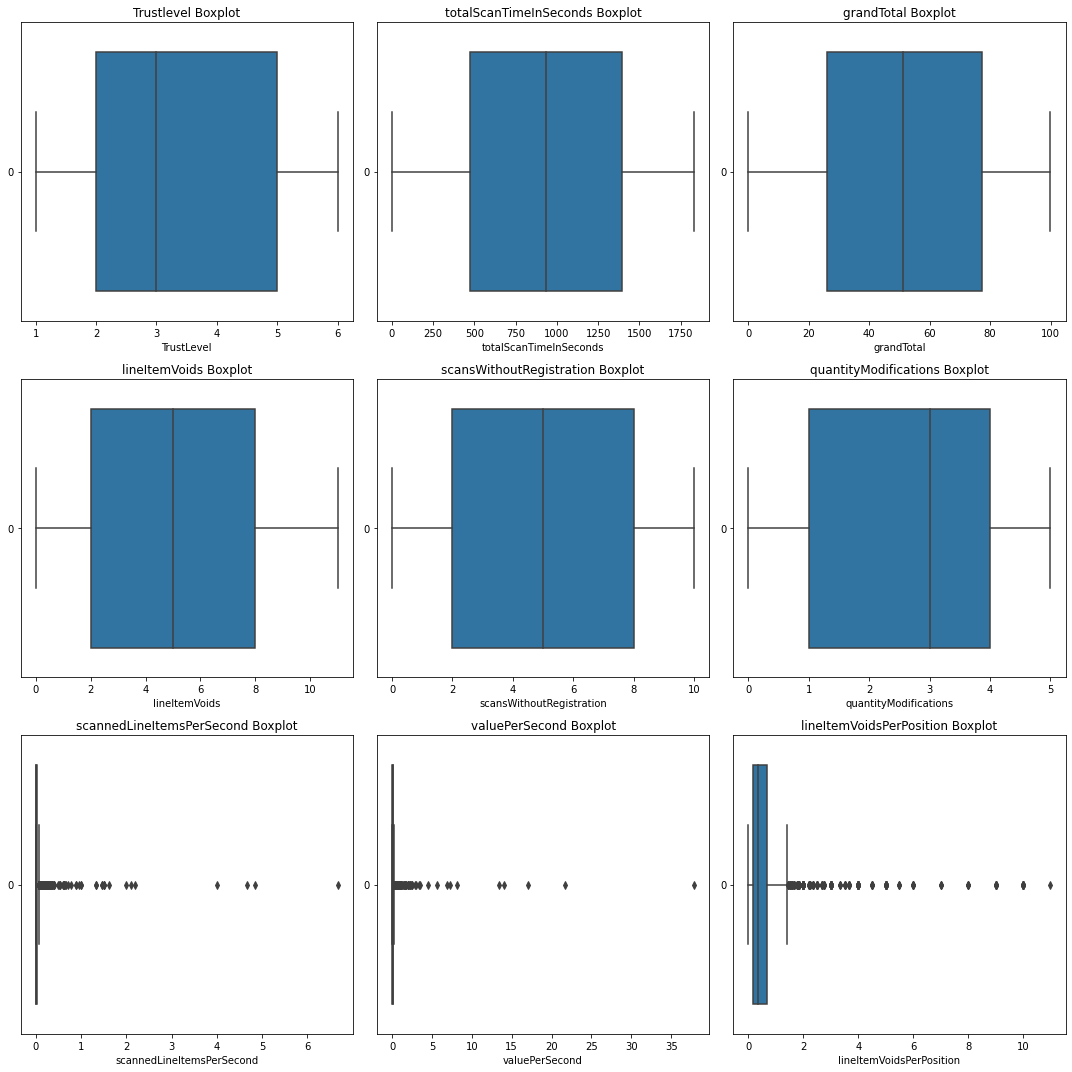

In [4]:
# create a boxplot to examine outliers
fig_grid2 = plt.figure(figsize=(15,15))

# fig TrustLevel 
fax3 = fig_grid2.add_subplot(331)
fax3.set_xlabel('TrustLevel')
fax3.set_title("Trustlevel Boxplot")
sns.boxplot(data=dataset["trustLevel"], orient="h")

# fig totalScanTimeInSeconds 
fax4 = fig_grid2.add_subplot(332)
fax4.set_xlabel('totalScanTimeInSeconds')
fax4.set_title("totalScanTimeInSeconds Boxplot")
sns.boxplot(data=dataset["totalScanTimeInSeconds"], orient="h")

# fig grandTotal 
fax5 = fig_grid2.add_subplot(333)
fax5.set_xlabel('grandTotal')
fax5.set_title("grandTotal Boxplot")
sns.boxplot(data=dataset["grandTotal"], orient="h")

# fig lineItemVoids 
fax5 = fig_grid2.add_subplot(334)
fax5.set_xlabel('lineItemVoids')
fax5.set_title("lineItemVoids Boxplot")
sns.boxplot(data=dataset["lineItemVoids"], orient="h")

# fig scansWithoutRegistration 
fax5 = fig_grid2.add_subplot(335)
fax5.set_xlabel('scansWithoutRegistration')
fax5.set_title("scansWithoutRegistration Boxplot")
sns.boxplot(data=dataset["scansWithoutRegistration"], orient="h")

# fig quantityModifications 
fax5 = fig_grid2.add_subplot(336)
fax5.set_xlabel('quantityModifications')
fax5.set_title("quantityModifications Boxplot")
sns.boxplot(data=dataset["quantityModifications"], orient="h")

# fig scannedLineItemsPerSecond 
fax5 = fig_grid2.add_subplot(337)
fax5.set_xlabel('scannedLineItemsPerSecond')
fax5.set_title("scannedLineItemsPerSecond Boxplot")
sns.boxplot(data=dataset["scannedLineItemsPerSecond"], orient="h")

# fig valuePerSecond 
fax5 = fig_grid2.add_subplot(338)
fax5.set_xlabel('valuePerSecond')
fax5.set_title("valuePerSecond Boxplot")
sns.boxplot(data=dataset["valuePerSecond"], orient="h")

# fig lineItemVoidsPerPosition 
fax5 = fig_grid2.add_subplot(339)
fax5.set_xlabel('lineItemVoidsPerPosition')
fax5.set_title("lineItemVoidsPerPosition Boxplot")
sns.boxplot(data=dataset["lineItemVoidsPerPosition"], orient="h")


# guarantee a nice layout to avoid overlapping
plt.tight_layout()

**3 last features hold outliers**

## Try to handle the outliers of the 3 features with the logarithm

### lineItemVoidsPerPosition

Skewness before logarithm: 4.315624
Skewness after logarithm: 2.069207


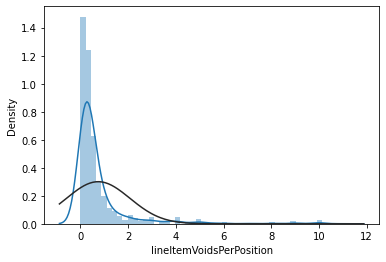

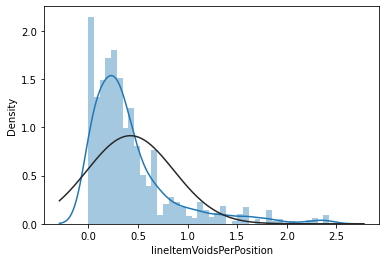

<Figure size 432x288 with 0 Axes>

In [5]:
# get skeweness value of the features 
# -1 or greater than 1 is highly skewed
# first picture shows distribution before the transformation second shows the state after the transformation

print("Skewness before logarithm: %f" % dataset['lineItemVoidsPerPosition'].skew())
fig = plt.figure()
sns.distplot(dataset['lineItemVoidsPerPosition'], kde=True, fit=norm)
fig = plt.figure()

#apply the logarithm
dataset['lineItemVoidsPerPosition'] = np.log(dataset['lineItemVoidsPerPosition']+1)
sns.distplot(dataset['lineItemVoidsPerPosition'], kde=True, fit = norm)
fig = plt.figure()

print("Skewness after logarithm: %f" % dataset['lineItemVoidsPerPosition'].skew())

### valuePerSecond

Skewness before Log: 20.771462
Skewness after Log: 7.060835


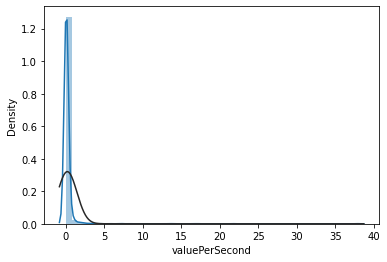

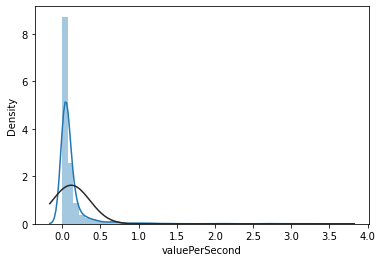

<Figure size 432x288 with 0 Axes>

In [6]:
# first picture shows distribution before the transformation second shows the state after the transformation

fig = plt.figure()
sns.distplot(dataset['valuePerSecond'], kde=True, fit=norm)
fig = plt.figure()
print("Skewness before Log: %f" % dataset['valuePerSecond'].skew())


# apply the logarithm
dataset['valuePerSecond'] = np.log(dataset['valuePerSecond']+1)
sns.distplot(dataset['valuePerSecond'], kde=True, fit = norm)
fig = plt.figure()
print("Skewness after Log: %f" % dataset['valuePerSecond'].skew())

### scannedLineItemsPerSecond

Skewness before Log: 15.078211
Skewness after Log: 8.739723


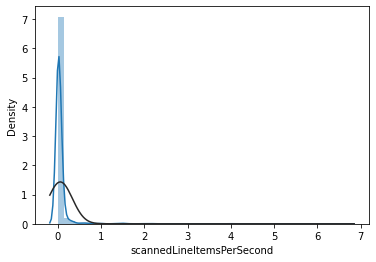

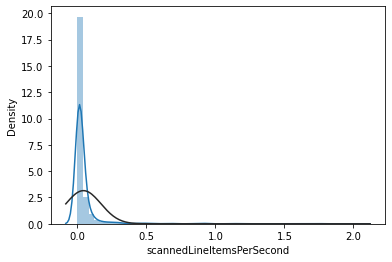

<Figure size 432x288 with 0 Axes>

In [7]:
# first picture shows distribution before the transformation second shows the state after the transformation

fig = plt.figure()
sns.distplot(dataset['scannedLineItemsPerSecond'], kde=True, fit=norm)
print("Skewness before Log: %f" % dataset['scannedLineItemsPerSecond'].skew())
fig = plt.figure()


# take the logarithm
dataset['scannedLineItemsPerSecond'] = np.log(dataset['scannedLineItemsPerSecond']+1)
sns.distplot(dataset['scannedLineItemsPerSecond'], kde=True,fit=norm)
fig = plt.figure()
print("Skewness after Log: %f" % dataset['scannedLineItemsPerSecond'].skew())

## Looking at the features again

Column name | Description | Value range
--- | --- | ---
**scannedLineItemsPerSecond** | Average number of scanned products per second | Positive decimal number
**valuePerSecond** | Average total value of scanned products per second | Positive decimal number
**lineItemVoidsPerPosition** | Average number of item voids per total number of all scanned and not cancelled products | Positive decimal number

We can safely say that scannedLineItemsPerSecond exceeding 4 must be a measurement error because it seems highly unlikely that sb. is able to scan more than 4 items in a second. However, lets take a closer look:

### scannedLineItemsPerSecond & valuePerSecond

In [8]:
#Import our dataset
dataset = pd.read_csv('data/train.csv', delimiter = '|')
dataset_org = dataset.copy()

In [9]:
# extreme outliers of scannedLineItemsPerSecond
dataset_lineItemsPerSecond = dataset[dataset['scannedLineItemsPerSecond'] >= 4]
dataset_lineItemsPerSecond

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
173,6,2,75.74,6,1,1,4.000000,37.870000,0.750000,0
1103,5,6,84.32,10,6,2,4.833333,14.053333,0.344828,0
1423,6,3,7.68,2,3,0,6.666667,2.560000,0.100000,0
1835,3,3,64.94,3,4,3,4.666667,21.646667,0.214286,0


In [10]:
# extreme outliers of valuePerSecond
dataset_valuePerSecond = dataset[dataset['valuePerSecond'] > 10]
dataset_valuePerSecond

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
173,6,2,75.74,6,1,1,4.000000,37.870000,0.750000,0
1103,5,6,84.32,10,6,2,4.833333,14.053333,0.344828,0
1154,5,4,53.65,11,5,4,1.500000,13.412500,1.833333,0
1715,1,2,34.07,5,9,4,0.500000,17.035000,5.000000,0
1835,3,3,64.94,3,4,3,4.666667,21.646667,0.214286,0


In [11]:
# cut these datapoints
dataset = dataset[dataset['scannedLineItemsPerSecond'] < 4]
cutted = len(dataset_org)-len(dataset)
print(f"{cutted} ({cutted/len(dataset_org)}) entries removed .")

4 (0.0021287919105907396) entries removed .


By examining the data we notice that these values overlap with valuePerSecond exceeding 15. Concidering these values also show a high correlation we could cut all items exceeding the 4 second scanning threshold and therefore also handle 3 outliers for the valuePerSecond feature. 

## lineItemVoidsPerPosition 

However, the topic of lineItemVoidsPerPosition seems to be rather difficult. Firstly we have more outliers here. Secondly the outliers could also be clumsy customers that do not really know how to utilize the scanner and therefore, have a higher number of Item Voids per position. Handling this feature with the IQR method and afterwards trim everything above a given threshold would cost us too many features.
</br> 
After applying the logarithm to all 3 features we saw that the results are not that great compared to the basic model. Hence, we tried to take a different approach for lineItemVoidsPerPosition and applied Winsorizing to this feature. Fortunately this had the positive effect we hoped for when looking at the Average Monetary Value.

In [12]:
#Import our dataset
dataset = pd.read_csv('data/train.csv', delimiter = '|')
dataset_org = dataset.copy()

# cut the identified outliers
dataset = dataset[dataset['scannedLineItemsPerSecond'] < 4]
cutted = len(dataset_org)-len(dataset)
print(f"{cutted} ({cutted/len(dataset_org)}) entries removed .")

# take the logarithm for scannedLineItemsPerSecond and valuePerSecond
dataset['scannedLineItemsPerSecond'] = np.log(dataset['scannedLineItemsPerSecond']+1)
dataset['valuePerSecond'] = np.log(dataset['valuePerSecond']+1)

4 (0.0021287919105907396) entries removed .


### Winsorize lineItemVoidsPerPosition

In [13]:
# look at the quantiles
print(dataset['lineItemVoidsPerPosition'].quantile([0.1,0.5,0.90]))

0.1    0.041667
0.5    0.352941
0.9    1.666667
Name: lineItemVoidsPerPosition, dtype: float64


Skewness before Winsorizing: 4.310932
Skewness after Winsorizing: 1.217376


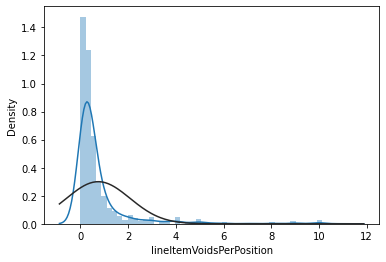

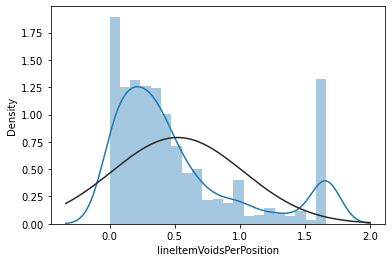

In [14]:
print("Skewness before Winsorizing: %f" % dataset['lineItemVoidsPerPosition'].skew())
fig = plt.figure()
sns.distplot(dataset['lineItemVoidsPerPosition'], kde=True, fit=norm)
fig = plt.figure()

#winsorizing all datapoints above the 0.9 quantile
dataset['lineItemVoidsPerPosition'] = winsorize(dataset['lineItemVoidsPerPosition'], limits=[0., .1])
sns.distplot(dataset['lineItemVoidsPerPosition'], kde=True, fit=norm)
print("Skewness after Winsorizing: %f" % dataset['lineItemVoidsPerPosition'].skew())

## Get performance of the model with the applied preprocessing steps

In [15]:
#Import our dataset
dataset = pd.read_csv('data/train.csv', delimiter = '|')
dataset_org = dataset.copy()
dataset = dataset[dataset['scannedLineItemsPerSecond'] < 4]
cutted = len(dataset_org)-len(dataset)
print(f"{cutted} ({cutted/len(dataset_org)}) entries removed .")


dataset['scannedLineItemsPerSecond'] = np.log(dataset['scannedLineItemsPerSecond']+1)
dataset['valuePerSecond'] = np.log(dataset['valuePerSecond']+1)
dataset['lineItemVoidsPerPosition'] = winsorize(dataset['lineItemVoidsPerPosition'], limits=[0., .1])

4 (0.0021287919105907396) entries removed .


In [16]:
X = dataset.drop('fraud', axis=1)
y = dataset.fraud

In [18]:
# see how the model performs 

cv = StratifiedKFold(n_splits=cv_split, shuffle=True, random_state=rs)
   
model = SVC(kernel="linear", random_state=rs)

# create the model pipeline

pipe_model = Pipeline([    
        ("model", model)
    ])

cv_results = cross_validate(pipe_model, X, y, cv=cv_split, scoring=monetary_score, n_jobs=-1)
print("Model performance on folds:\t\t",cv_results['test_score'])
print("Model mean monetary score:\t\t", cv_results['test_score'].mean())
print("Model double standard deviation:\t", 2*cv_results['test_score'].std())

Model performance on folds:		 [-0.3        -0.71428571 -0.33333333 -0.47619048 -0.28571429]
Model mean monetary score:		 -0.42190476190476184
Model double standard deviation:	 0.3221019401741405


## Conclusion

### old conclusion
While handling the outliers of **scannedLineItemsPerSecond** and **valuePerSecond** seem to improve the cross val score the handling of the **lineItemVoidsPerPosition** outliers with the IQR method seem to worsen our performance. This might be due to the fact that we loose 223 rows and therefore, a lot of info. Looking at the data in detail, we see that outlier valies of **lineItemVoidsPerPosition** do not show any fraud. This lets us conclude that these customers might be rather new to the scanning checkout system and do not know how to operate these systems. Or they might just be too much distracted while checking out. However, on the first glimpse this feature does not provide much info for our classification since it is also not correlated at all with our fraud feature. 

What it tells us is that most customers have less lineItemVoidsPerPosition on average than valid Product scans.
Customers that have  more invalid Scans than valid Scans seem to be our outlier customers

At the end we decide to leave in the outliers of this feature and handle its skewedness by winsorizing it. In this way we do not loose any information.

### new conclusion
- we cut 4 outliers of **scannedLineItemsPerSecond** because we classifyed them as measurement errors
- To handle the skeweness of the outlier features we took the logarithm of **scannedLineItemsPerSecond** and **valuePerSecond**
- For the feature **lineItemVoidsPerPosition** winsorizing was the better approach to tackle its skeweness